<a href="https://colab.research.google.com/github/PrashantShrivastava1612/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
# importing libraries for analysis
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind

#importing libraries for preprocessing and ML Implementation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Capstone Project/Bike Sharing Demand Prediction/SeoulBikeData.csv'
data = pd. read_csv(path, encoding = "ISO-8859-1")

In [159]:
# Dataset First Look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [160]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [161]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

In [162]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [163]:
#null values in dataset
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [164]:
#duplicate values count
data.duplicated().sum()

0

Our dataset contains 8760 rows and 14 columns.

No null value is present in the datset.

No duplicate observations were present in the dataset.

## ***Understanding Variables***

In [165]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')



Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [166]:
# Dataset Describe
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


###***Variable Description***

## ***Data Wrangling***

In [167]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [168]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [169]:
data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [170]:
def functioning(val):
  if val=='Yes':
    return 1
  else:
    return 0

In [171]:
def holiday( val):
  if val=='No Holiday':
    return 0
  else:
    return 1

In [172]:
data['Functioning Day'] = data['Functioning Day'].apply(functioning)
data['Holiday'] = data['Holiday'].apply(holiday)

In [173]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y", infer_datetime_format='%d%m%Y', exact=True)

In [174]:
# split day of week, month and year in three column
data['day_of_week'] = data['Date'].dt.day_name() # extract week name from Date column
data["month"] = data['Date'].dt.month_name()   # extract month name from Date column
data["year"] = data['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [175]:
#new column that indicates whether each row corresponds to a weekday or a weekend:
data['weekday'] = data['Date'].dt.weekday < 5

## ***Data Exploration and Visualisation***

###***Univariate Analysis***

<Axes: >

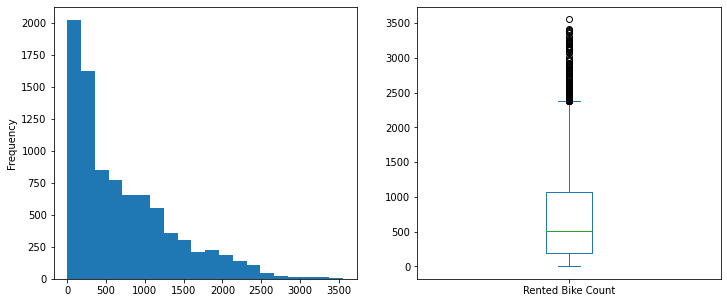

In [176]:
#distribution of target variable
fig = plt.figure(figsize=(25, 5))

df1 = data['Rented Bike Count']

ax1 = fig.add_subplot(141)
df1.plot.hist(ax=ax1, bins=20)

df2 = data['Rented Bike Count']

ax2 = fig.add_subplot(142)
df2.plot.box(ax=ax2)

In [177]:
numerical_features = [ ('Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)'),('Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)')]


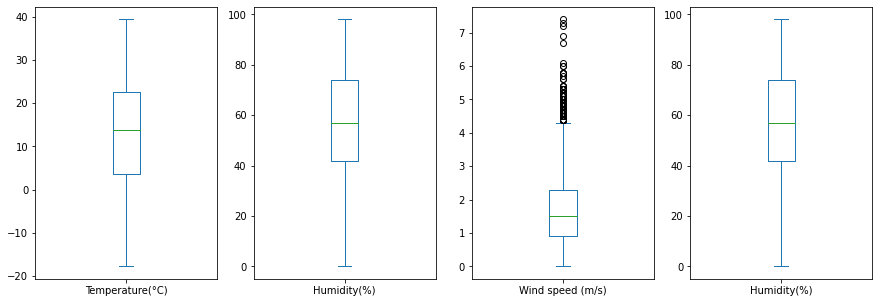

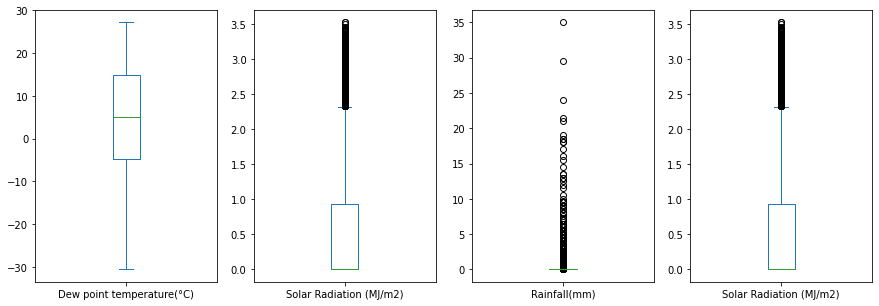

In [178]:

for i,j,k,l in numerical_features:
  fig = plt.figure(figsize=(15, 5))

  df1 = data[i]

  ax1 = fig.add_subplot(141)
  df1.plot.box(ax=ax1)

  df2 = data[j]

  ax2 = fig.add_subplot(142)
  df2.plot.box(ax=ax2)

  df3 = data[k]

  ax3 = fig.add_subplot(143)
  df3.plot.box(ax=ax3)

  df4 = data[l]

  ax4 = fig.add_subplot(144)
  df2.plot.box(ax=ax4)

  plt.show()


In [179]:
numerical_features =  [ 'Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']


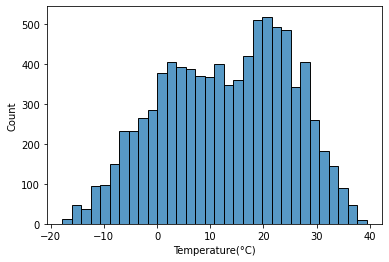

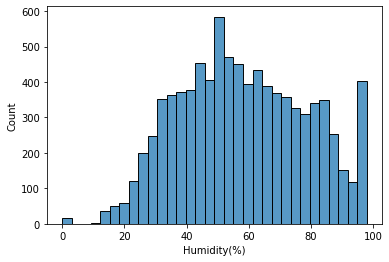

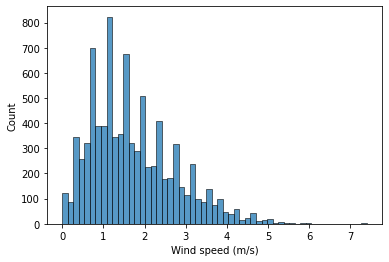

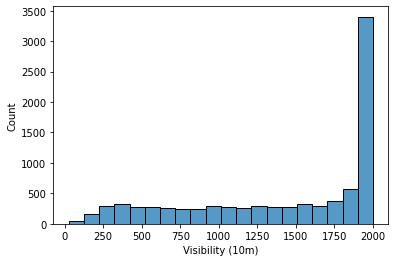

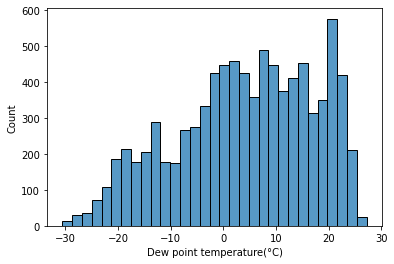

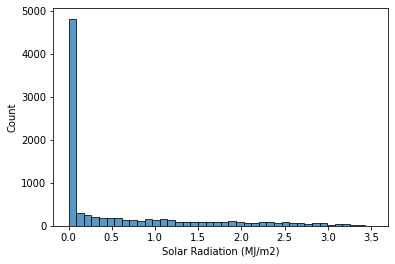

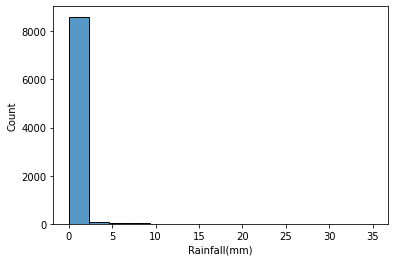

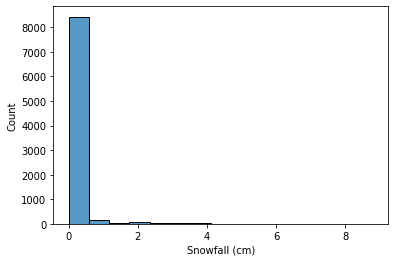

In [180]:
for i in numerical_features:
  sns.histplot(x=data[i])
  plt.show()

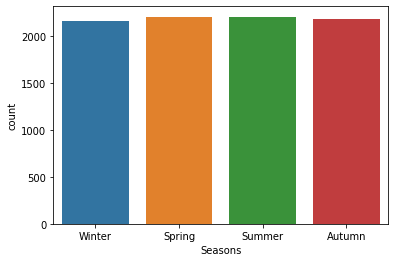

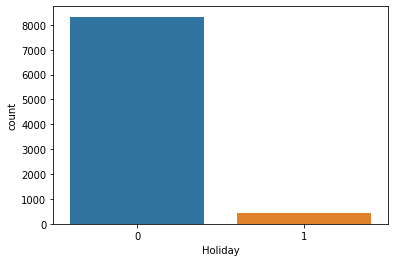

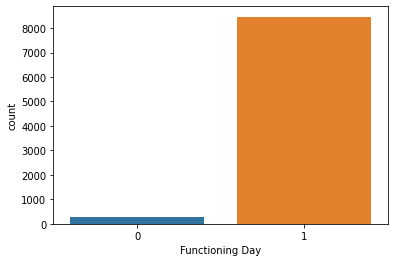

In [181]:
categorical=['Seasons','Holiday', 'Functioning Day']
for i in categorical:
  sns.countplot(data=data, x=i)
  plt.show()

###***Bivariate Analysis***

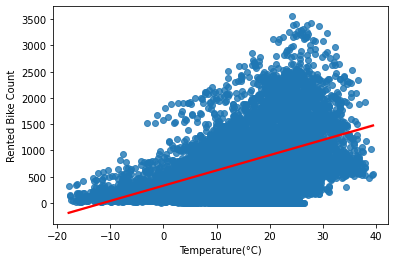

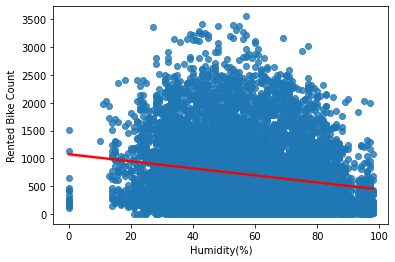

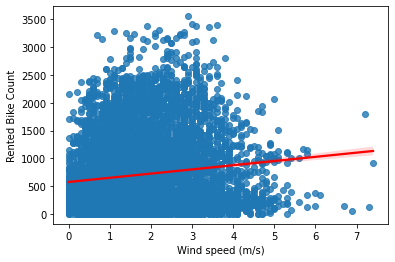

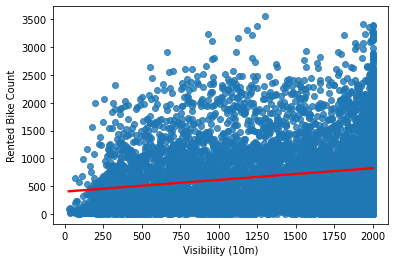

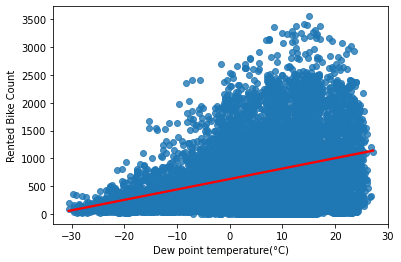

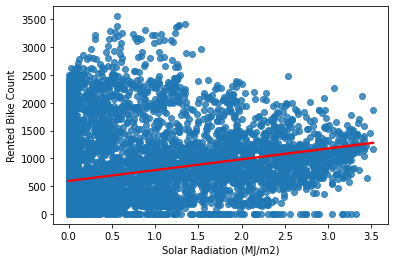

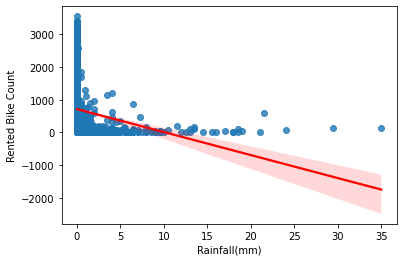

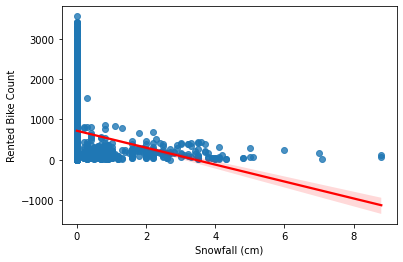

In [182]:
#Understanding relationship of variables with target variable
for i in numerical_features:
  sns.regplot(data, x=i, y='Rented Bike Count',line_kws={"color": "red"})
  plt.show()

<Axes: xlabel='weekday', ylabel='Rented Bike Count'>

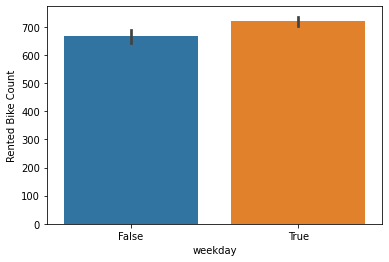

In [183]:
# distribution of bike rentals for weekdays and weekends
sns.barplot(x='weekday', y='Rented Bike Count', data=data)

In [184]:
holiday_rent = pd.DataFrame(data.groupby('Holiday').agg({'Rented Bike Count':'mean'})).reset_index()
season_rent = pd.DataFrame(data.groupby('Seasons').agg({'Rented Bike Count':'mean'})).reset_index()

Text(0.5, 1.0, 'Holiday vs Mean Rented Bike count')

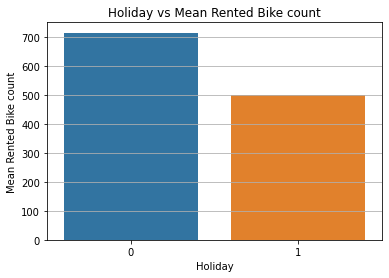

In [185]:
plt.grid()
sns.barplot(holiday_rent, x='Holiday',y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Holiday vs Mean Rented Bike count')


Text(0.5, 1.0, 'Season vs Mean Rented Bike count')

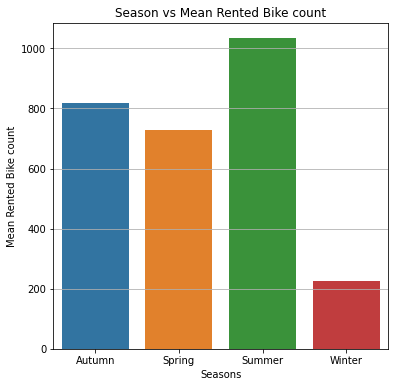

In [186]:
plt.figure(figsize=(6,6))
plt.grid()
sns.barplot(season_rent,  x='Seasons', y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Season vs Mean Rented Bike count')

In [187]:
daywise_rent = data.groupby(by='day_of_week').agg({'Rented Bike Count':'mean'}).reset_index()


Text(0.5, 1.0, 'Day vs Mean Rented Bike count')

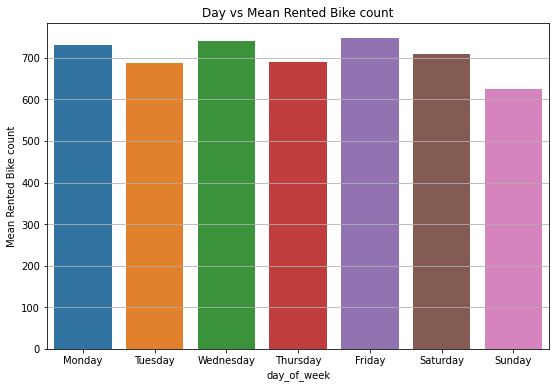

In [188]:
order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(9,6))
plt.grid()
sns.barplot(daywise_rent, x='day_of_week', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Day vs Mean Rented Bike count')

In [189]:
monthwise_rent = data.groupby(by='month').agg({'Rented Bike Count':'sum'}).reset_index()
monthwise_rent

,month,Rented Bike Count
0,April,524227
1,August,651887
2,December,185330
3,February,151833
4,January,150006
5,July,734460
6,June,896887
7,March,380594
8,May,707088
9,November,465715


Text(0.5, 1.0, 'Month vs Mean Rented Bike count')

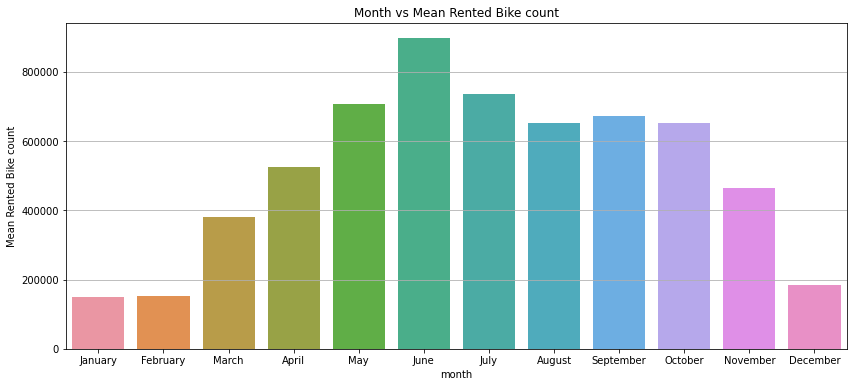

In [190]:
order = ['January','February','March', 'April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
plt.grid()
sns.barplot(monthwise_rent, x='month', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Month vs Mean Rented Bike count')

In [191]:
hourwise_rent = data.groupby(by='Hour').agg({'Rented Bike Count':'mean'}).reset_index()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count')

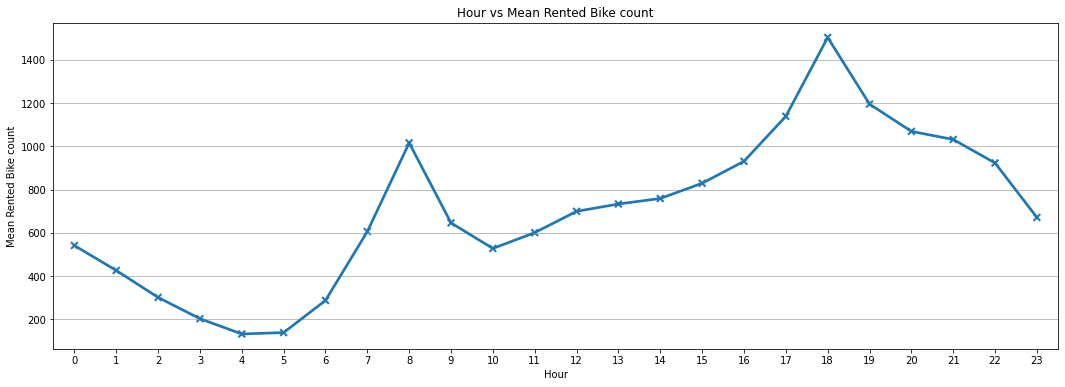

In [192]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(hourwise_rent, x='Hour', y='Rented Bike Count', markers='x')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count')

Text(0.5, 1.0, 'Hour vs Rented Bike count')

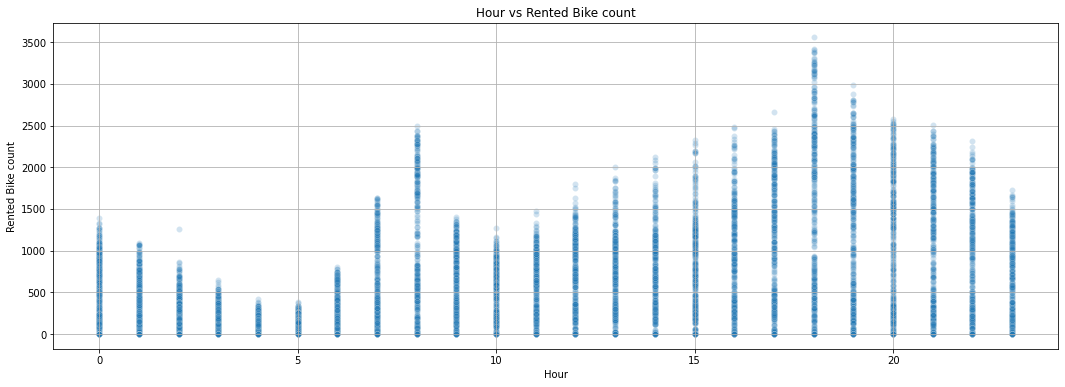

In [193]:
plt.figure(figsize=(18,6))
plt.grid()
sns.scatterplot(data, x='Hour', y='Rented Bike Count', alpha=0.2)
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count')

Text(0, 0.5, 'Rented Bikes')

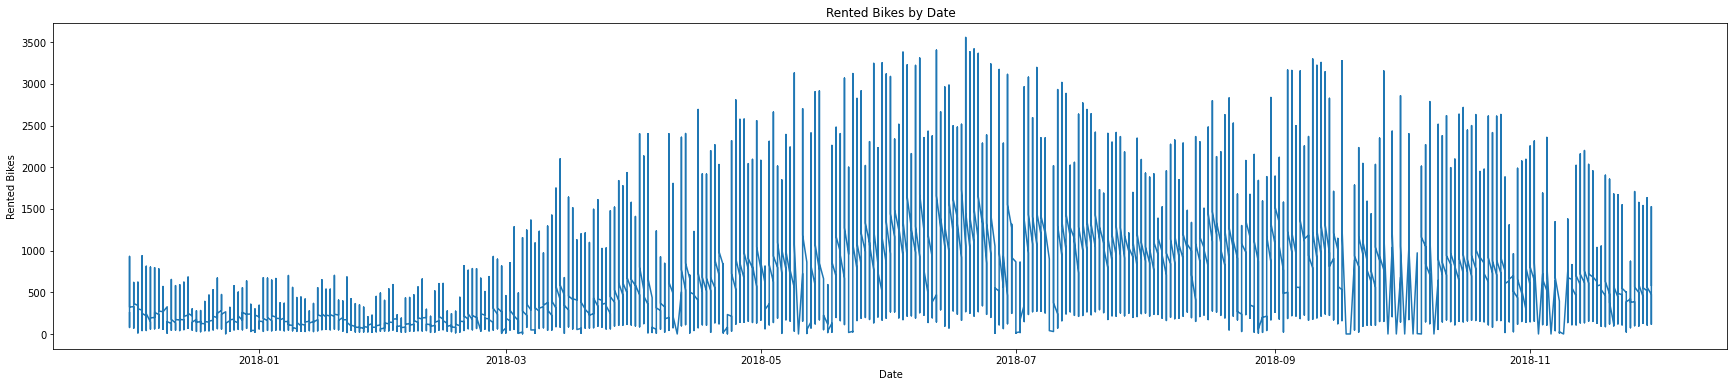

In [194]:
# Plotting the time series of given dataframe
plt.figure(figsize=(30,6))
plt.plot(data['Date'], data['Rented Bike Count'])
 
# Giving title to the chart using plt.title
plt.title('Rented Bikes by Date')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rented Bikes')

### ***Multivariate Analysis***

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs days')

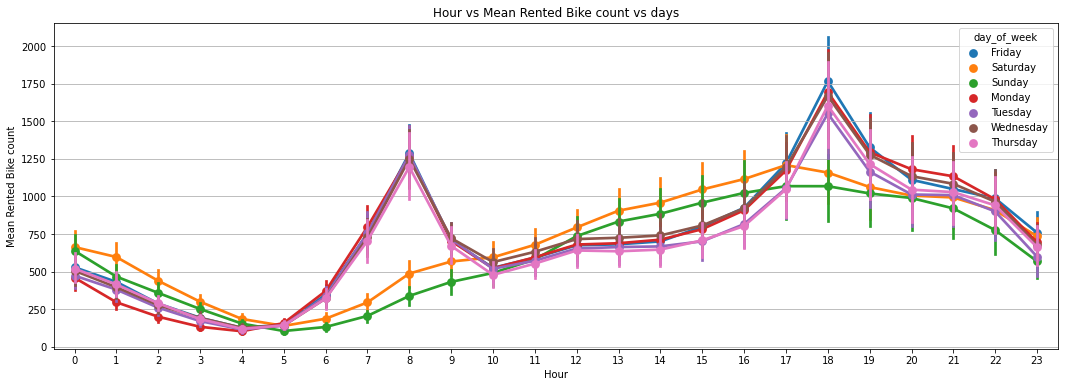

In [195]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='o', hue='day_of_week')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs days')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the futu

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs Seasons')

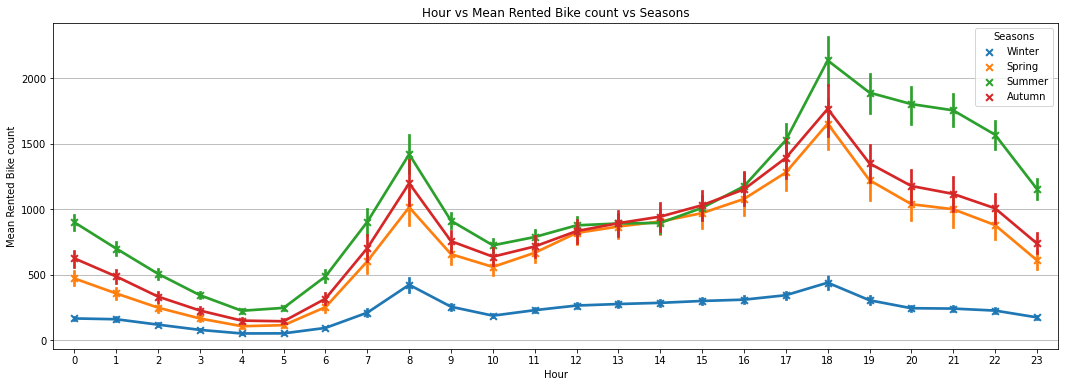

In [196]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='x', hue='Seasons')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs Seasons')

<Axes: >

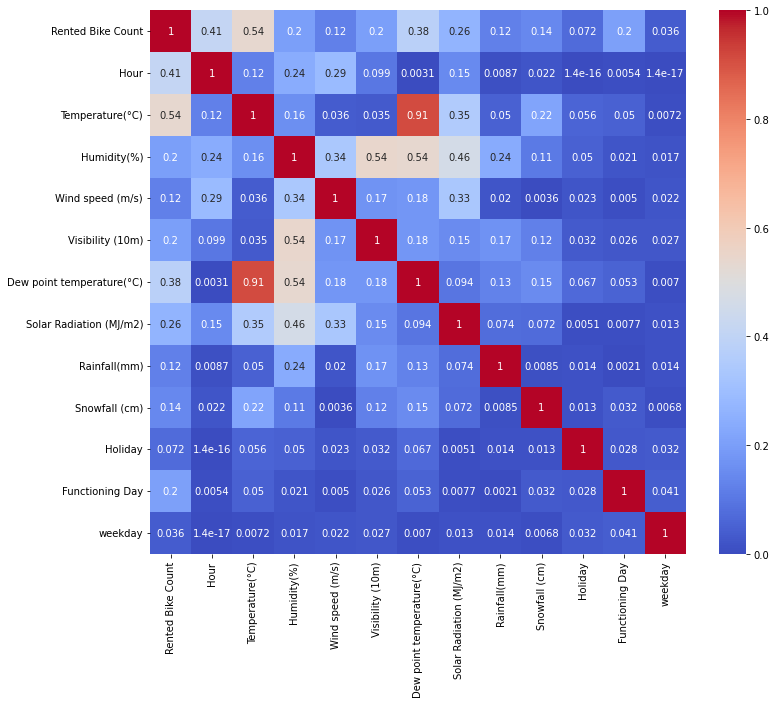

In [197]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().abs(), annot=True,cmap='coolwarm')

## ***Hypothesis Testing***

### **Hypothetical Statement - 1**
### The average number of bike rentals is different on weekends than on weekdays.

**Null Hypothesis** --> Average bike rentals is same on Weekend as well as Weekdays.

**Alternative Hypothesis** --> Average bike rentals is different on Weekend and Weekdays.

In [198]:
#split the data into two groups: one for weekdays and one for weekends
weekday_rentals = data.loc[data['weekday'], 'Rented Bike Count']
weekend_rentals = data.loc[~data['weekday'], 'Rented Bike Count']

In [199]:
#perform a two-sample t-test to compare the means of the two groups
t_stat, p_val = ttest_ind(weekday_rentals, weekend_rentals)
print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 3.4150448192415523
p-value: 0.0006406092926737229


In [200]:
# Determine if the p-value is significant at the 5% level
if p_val < 0.05:
    print('Reject the null hypothesis:')
    print('The mean number of bike rentals is significantly different on weekends compared to weekdays.')
else:
    print('Fail to reject the null hypothesis:')
    print('There is not enough evidence to conclude that the mean number of bike rentals is significantly different on weekends compared to weekdays.')

Reject the null hypothesis:
The mean number of bike rentals is significantly different on weekends compared to weekdays.


### **Hypothetical Statement-2**

### There is a significant difference in the average number of bike rentals during different seasons.

**Null Hypothesis** --> Average number of bike rentals is same during different seasons.

**Alternative Hypothesis** --> Average number of bike rentals is different during different seasons.

In [201]:
# Separate the data into four groups (one for each season)
spring_rentals = data.loc[data['Seasons'] == 'Spring', 'Rented Bike Count']
summer_rentals = data.loc[data['Seasons'] == 'Summer', 'Rented Bike Count']
fall_rentals = data.loc[data['Seasons'] == 'Autumn', 'Rented Bike Count']
winter_rentals = data.loc[data['Seasons'] == 'Winter', 'Rented Bike Count']

In [202]:
# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

In [203]:
# Print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 776.4678149879506
p-value: 0.0


In [204]:
# Determine if the p-value is significant at the 5% level
if p_value < 0.05:
    print('We reject the null hypothesis:')
    print('There is a significant difference in the average number of bike rentals during different seasons.')
else:
    print('We fail to reject the null hypothesis:')
    print('There is not enough evidence to conclude that there is a significant difference in the average number of bike rentals during different seasons.')

We reject the null hypothesis:
There is a significant difference in the average number of bike rentals during different seasons.


## ***Feature Engineering & Data Pre-processing***

### Handling Missing Values

There were no missing values in the given dataset.

### Handling Outliers

There were no exceptional outliers present in the dataset. Removing the current outliers would result in loss of very important data.

### Feature Manipulation and Selection

In [205]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True


In [206]:
df=data.copy()

In [207]:
def hourly_demand(num):
  low_hours = [1,2,3,4,5,6]
  moderate_hours = [0,7,9,10,11,12,13,14,15,23]
  high_hours = [8,16,17,19,20,21,22]
  very_high_hours = [18]
  if num in low_hours:
    return 'low_hour'
  elif num in moderate_hours:
    return 'moderate_hour'
  elif num in high_hours:
    return 'high_hour'
  else:
    return 'very_high_hour'

In [208]:
df['hour_category'] = df['Hour'].apply(hourly_demand)

In [209]:
df['weekday']=df['weekday'].apply(int)

In [210]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekday,hour_category
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,1,moderate_hour
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,1,low_hour
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,1,low_hour
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,1,low_hour
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,1,low_hour


In [211]:
model_df = df.drop(columns=['Date','Hour','Dew point temperature(°C)','Seasons','day_of_week','year'])

In [212]:

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [213]:
calc_vif(model_df[[i for i in model_df.describe().columns if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Temperature(°C),3.270836
1,Humidity(%),11.586785
2,Wind speed (m/s),4.278674
3,Visibility (10m),6.677765
4,Solar Radiation (MJ/m2),2.430999
5,Rainfall(mm),1.080904
6,Snowfall (cm),1.119346
7,Holiday,1.056786
8,Functioning Day,17.921403
9,weekday,3.438879


In [214]:
model_df = model_df.drop(columns=['Functioning Day'])

In [215]:
calc_vif(model_df[[i for i in model_df.describe().columns ]])

,variables,VIF
0,Rented Bike Count,3.474992
1,Temperature(°C),4.460762
2,Humidity(%),5.734015
3,Wind speed (m/s),4.239224
4,Visibility (10m),5.008621
5,Solar Radiation (MJ/m2),2.269517
6,Rainfall(mm),1.096281
7,Snowfall (cm),1.120101
8,Holiday,1.060811
9,weekday,3.449959


### **Data Transformation**

In [216]:
model_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'month', 'weekday',
       'hour_category'],
      dtype='object')

In [217]:
model_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,month,weekday,hour_category
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,December,1,moderate_hour
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,December,1,low_hour
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,December,1,low_hour
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,December,1,low_hour
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,December,1,low_hour


In [218]:
numeric_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)','Rented Bike Count']

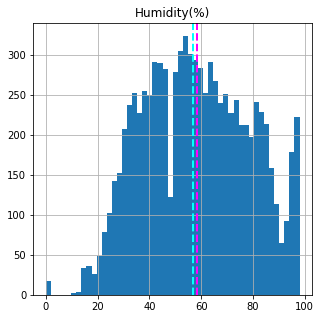

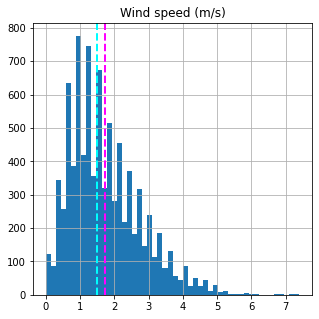

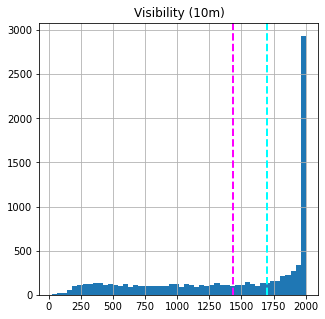

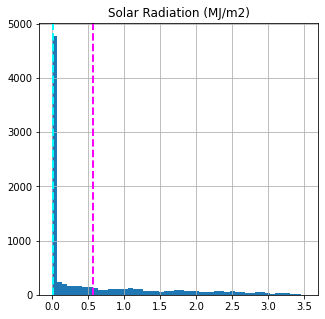

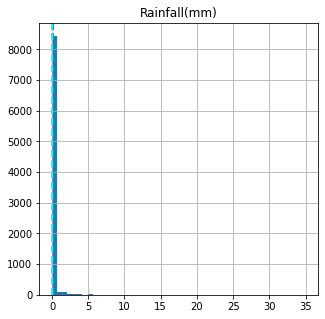

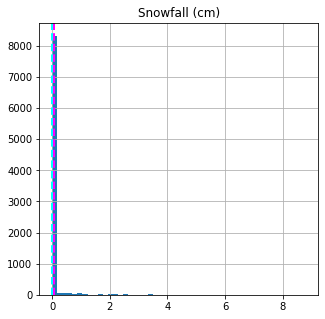

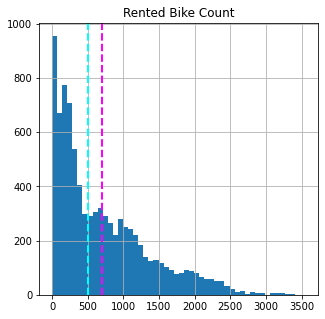

In [219]:
# distribution plot for each numerical feature count 

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    feature = model_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [220]:
model_df = pd.get_dummies(model_df, columns=['month','hour_category'])

In [221]:
model_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'weekday', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September',
       'hour_category_high_hour', 'hour_category_low_hour',
       'hour_category_moderate_hour', 'hour_category_very_high_hour'],
      dtype='object')

### **Data Splitting**

In [222]:
independent_variables = [i for i in model_df.columns if i not in ['Rented Bike Count']]
print(independent_variables)
dependent_variable = 'Rented Bike Count'

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'weekday', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'hour_category_high_hour', 'hour_category_low_hour', 'hour_category_moderate_hour', 'hour_category_very_high_hour']


In [223]:
# Create the data of independent variables
X = model_df[independent_variables].values

# Create the dependent variable data
y = model_df[dependent_variable].values

In [224]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

###**Data Scaling**

In [225]:
# Scaling data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***ML Model Implementation***

### **Linear Regression**

In [226]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [227]:
y_pred_train = regressor.predict(X_train)

In [228]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [229]:
#Predicted trip_duration on the test data
y_pred

array([ 597.5,  670.5, 1925. , ...,  841. ,  458.5,  746.5])

In [230]:
# Actual trip_duration on test data
y_test

array([   0,  233, 1929, ...,  936,  572, 1353])

In [231]:
mean_squared_error(y_test, y_pred)

154899.30793378994

In [232]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

403.2682738476537

In [233]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

393.57249387347935

In [234]:
r2_score(y_train, y_pred_train)

0.605469564311218

In [235]:
r2_score(y_test, y_pred)

0.6405652264423263

### **Random Forest**

In [236]:
from sklearn.ensemble import RandomForestRegressor
ensemble_regressior = RandomForestRegressor()

In [238]:
ensemble_regressior.fit(X_train,y_train)

RandomForestRegressor()

In [239]:
y_pred=ensemble_regressior.predict(X_test)

In [240]:
r2_score(y_test, y_pred)

0.8241083885040803

In [241]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8215607116284152


In [242]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 75800.92661152968
RMSE : 275.31968075589816


### **XGBoost**

In [243]:
import xgboost as xgb

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2

[19:32:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9354114027460209
Test score: 0.8274070516761004


0.8274070516761004